# Artificial Intelligence CA3
### Fateme Karami

In [467]:
from keras.applications import VGG16
from keras.models import Model

from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
import os
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from sklearn.metrics import homogeneity_score
from sklearn.metrics import silhouette_score

In [468]:
weights_path = './vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
base_model = VGG16(weights=weights_path, include_top=False)
feature_extractor = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_pool').output)

In [ ]:
images_directory = './flower_images'
all_features = []
files = []
for filename in os.listdir(images_directory):
    if filename.endswith('.png'):
        files.append(filename)
files.sort()
for filename in files:
    img_path = os.path.join(images_directory, filename)
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = feature_extractor.predict(x)
    all_features.append(features)
all_features = np.concatenate(all_features, axis=0)

Question 1.

Extracting features from images has several advantages over reading the raw pixel values of images:

1. Hierarchical Representation: Deep learning models like VGG16 are designed to learn hierarchical representations of images. They extract meaningful features of the images, like edges and textures or object parts and whole objects. These learned features capture richer information about the content of the images than just the pixels.

2. Feature Abstraction: Deep learning models learn to ignore irrelevant details and focus on the most important aspects of the images. By extracting features we represent the more significant features of the image while discarding noise and irrelevant information.

3. Dimensionality Reduction: The feature representations we get from deep learning models typically have lower dimensionality compared to raw pixel values. This reduction in dimensionality can simplify subsequent analysis and make it more computationally efficient.

Question 2.

Feature extraction techniques:

1. Handcrafted Feature Extraction: 
In this approach, features are manually designed and extracted from images using techniques such as edge detection, texture analysis and keypoint detection. Common handcrafted features include Histogram of Oriented Gradients (HOG), Local Binary Patterns (LBP), Scale-Invariant Feature Transform (SIFT), and Speeded Up Robust Features (SURF). These features are often used in traditional computer vision pipelines and are suitable for tasks such as object detection, image classification, and image retrieval. These techniques may lack the ability to capture complex patterns in images.

2. Deep Learning Feature Extraction:
Deep learning models, particularly convolutional neural networks, automatically learn hierarchical representations of images. Features are extracted from images by passing them through pre-trained CNN models, such as VGG, ResNet, or Inception, and extracting activations from intermediate layers. These features capture informations including low-level features like edges and textures, as well as high-level semantic concepts like object categories and scene contexts. Deep learning feature extraction has demonstrated superior performance in image classification, object detection, semantic segmentation, and image generation.

3. Transfer Learning:
Transfer learning is a technique that leverages pre-trained deep learning models to extract features from images and transfer them to new tasks or domains with limited training data. Instead of training a model from scratch on a target task, features are extracted from images using a pre-trained model, and a new model is trained using these features as input. Transfer learning allows for efficient utilization of pre-trained models trained on large-scale datasets like ImageNet, enabling faster convergence and better generalization on new tasks with smaller datasets. Transfer learning has been successfully applied to a wide range of applications, including medical imaging, satellite image analysis, and industrial inspection.

Question 3.

Preprocessing the images:
1. Resizing:
Images may need to be resized to a fixed size suitable for the input requirements of the feature extraction model.

2. Normalization:
Normalizing the pixel values of images helps in improving the convergence and stability of deep learning models during training.
Pixel values are usually scaled to a range of [0, 1] or [-1, 1] by dividing by 255 or by subtracting the mean and dividing by the standard deviation of the pixel values across the dataset.

3. Centering:
Centering involves subtracting the mean pixel value of the dataset from each pixel in the image. This helps in zero-centering the data, which can aid in training deep learning models more effectively.

4. Data Augmentation:
Data augmentation techniques, such as random rotation, scaling, flipping, and cropping, can be applied to increase the variability and robustness of the training data. Data augmentation helps in preventing overfitting.

5. Conversion to Tensor Format:
Deep learning models typically expect input data in the form of tensors. Therefore, images need to be converted from their original format (JPEG, PNG, ...) to tensor format before giving them to the model.

Question 4.

KMeans and DBSCAN pros and cons:

KMeans:

pros:

1. Fast and scalable: It can handle large datasets efficiently due to its computational simplicity.

2. Guaranteed convergence: KMeans converges to a local minimum, ensuring convergence with every run.

3. Control over the number of clusters: The user can specify the number of clusters to be generated.

cons:

1. Sensitive to initialization: KMeans performance can vary significantly based on the initial choice of cluster centroids.

2. Assumes spherical clusters: KMeans assumes that clusters are spherical and have roughly equal variance, which may not be true for all datasets.

3. Sensitive to outliers: KMeans is sensitive to outliers and noisy data, which can affect the clustering results.

4. Requires predefined number of clusters: The number of clusters must be specified in advance, which may not always be known beforehand.

DBSCAN:

pros:

1. Automatic cluster determination: DBSCAN automatically determines the number of clusters based on the density of the data.

2. Robust to outliers: DBSCAN is robust to outliers and can identify noise points as outliers.

3. No assumptions about cluster shape: DBSCAN does not assume any specific shape for clusters and can detect clusters of varying shapes.

cons:

1. Sensitive to parameters: DBSCAN performance is sensitive to the choice of parameters such as epsilon and min_samples.

2. Computationally expensive for large datasets: DBSCAN's time complexity can be higher, especially for large datasets with high dimensionality.

3. Difficulty handling clusters of varying densities: DBSCAN may struggle to cluster data with varying densities, as it relies on a single epsilon value for defining neighborhood density.

In summary,  KMeans is simple, fast, and suitable for datasets with well-defined spherical clusters, DBSCAN is more robust to noise and can handle datasets with arbitrary shapes and varying densities.

In [470]:
num_images, height, width, channels = all_features.shape
features_flat = all_features.reshape(num_images, height * width * channels)

In [471]:
k_values = range(1, 21)
inertia = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(features_flat)
    inertia.append(kmeans.inertia_)

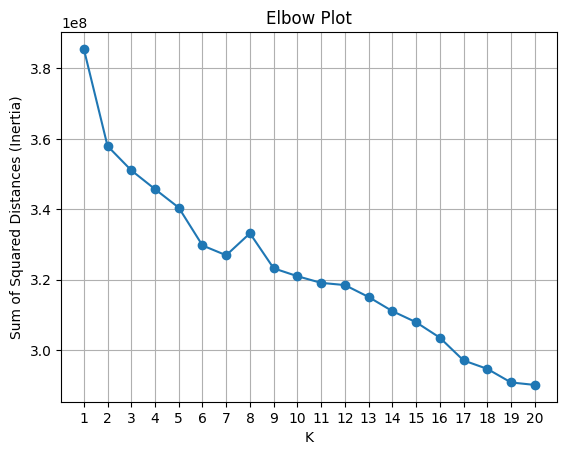

In [472]:
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.xlabel('K')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.title('Elbow Plot')
plt.xticks(k_values)
plt.grid(True)
plt.show()

Question 5.

An elbow plot is used for finding the most suitable number of clusters. This plot shows the reduction of variance within each cluster for different values of K. The point where the reduction of variance starts to diminish (forming an "elbow" shape in the plot) can indicate the optimal value of K. In this project, K can be any number between 6 and 10.

In [473]:
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init='auto')
kmeans.fit(features_flat)

KMeans(n_clusters=10, n_init='auto', random_state=42)

In [474]:
epsilon = 165
min_samples = 5
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
dbscan.fit(features_flat)

DBSCAN(eps=165)

In [475]:
pca = PCA(n_components=2)
features_reduced = pca.fit_transform(features_flat)
kmeans_cluster_labels = kmeans.fit_predict(features_reduced)
dbscan_cluster_labels = dbscan.fit_predict(features_reduced)

Question 7.

Principal Component Analysis (PCA) is a dimensionality reduction technique commonly used in machine learning and data analysis. Its goal is to reduce the dimensionality of a dataset while preserving as much variance as possible. PCA achieves this by transforming the original features into a new set of uncorrelated features called principal components.

PCA first centers the data by subtracting the mean of each feature. This step ensures that the data is centered around the origin. Then computes the covariance matrix of the centered data. The covariance matrix quantifies the relationships between different features in the dataset. PCA Then performs singular value decomposition on the covariance matrix to obtain its eigenvectors and eigenvalues. The eigenvectors represent the directions (or axes) of maximum variance in the dataset, and the corresponding eigenvalues represent the magnitude of variance along those directions. Lastly PCA selects a subset of the principal components that capture the most variance in the data. The principal components are sorted in descending order of their corresponding eigenvalues, indicating the amount of variance they explain. Finally, PCA projects the original data onto the subspace spanned by the selected principal components. This results in a lower-dimensional representation of the data while preserving the most important features and capturing the maximum variance.

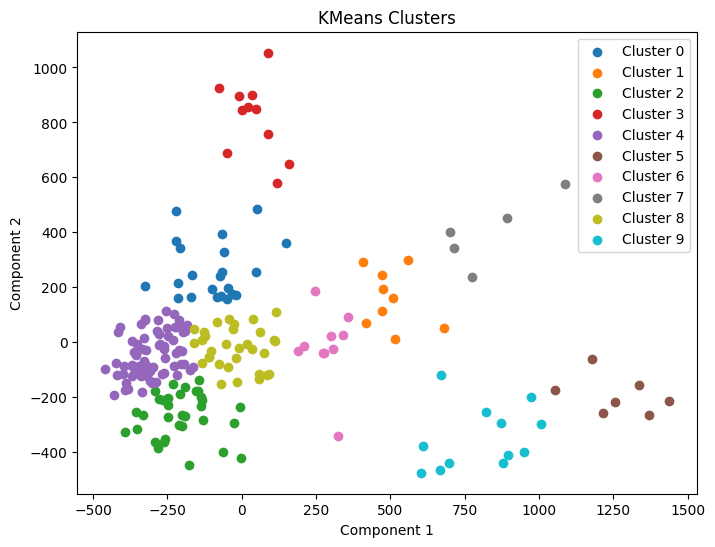

In [476]:
plt.figure(figsize=(8, 6))
for i in range(num_clusters):
    plt.scatter(features_reduced[kmeans_cluster_labels == i, 0], features_reduced[kmeans_cluster_labels == i, 1], label=f'Cluster {i}')
plt.title('KMeans Clusters')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()

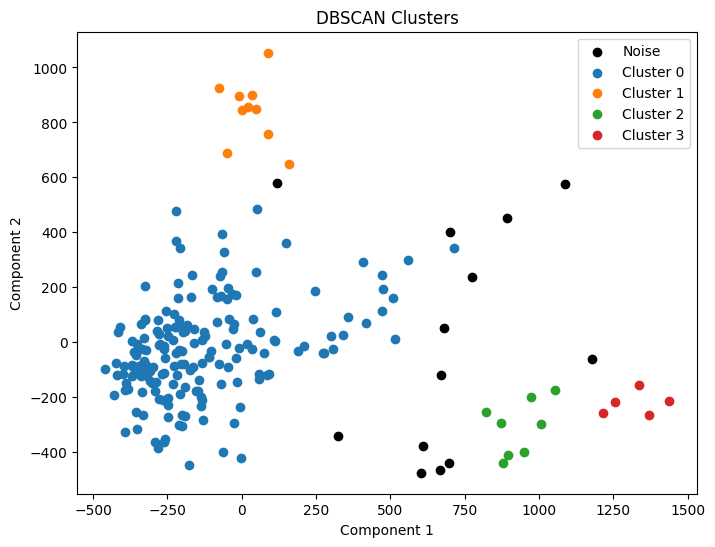

In [477]:
plt.figure(figsize=(8, 6))
unique_labels = np.unique(dbscan_cluster_labels)
for label in unique_labels:
    if label == -1:
        plt.scatter(features_reduced[dbscan_cluster_labels == label, 0], features_reduced[dbscan_cluster_labels == label, 1], 
        color='black', label='Noise')
    else:
        plt.scatter(features_reduced[dbscan_cluster_labels == label, 0], features_reduced[dbscan_cluster_labels == label, 1], 
        label=f'Cluster {label}')
plt.title('DBSCAN Clusters')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()

Question 6.

As seen in the plots, in the KMeans algorithm the clusters are spherical and all points are assigned with a cluster, meaning there are no noise points. Also the clusters are mostly of the same size. The output of the KMeans algorithm depends highly on the input number of clusters which should be pre-defined.

The output generated by the DBSCAN algorithm on the other hand, is robust to outliers meaning there are points that belong to neither of the clusters. Also the clusters are not necessarily spherical and they have varying sizes.

In [478]:
df = pd.read_csv(os.path.join(images_directory, 'flower_labels.csv'))
true_labels = df.iloc[:, 1].tolist()

In [479]:
kmeans_homogeneity = homogeneity_score(true_labels, kmeans_cluster_labels)
kmeans_silhouette = silhouette_score(features_reduced, kmeans_cluster_labels)
print("KMeans Homogeneity Score:", kmeans_homogeneity)
print("KMeans Silhouette Score:", kmeans_silhouette)

KMeans Homogeneity Score: 0.4622310721098819
KMeans Silhouette Score: 0.40588236


In [480]:
dbscan_homogeneity = homogeneity_score(true_labels, dbscan_cluster_labels)
dbscan_silhouette = silhouette_score(features_reduced, dbscan_cluster_labels)
print("DBSCAN Homogeneity Score:", dbscan_homogeneity)
print("DBSCAN Silhouette Score:", dbscan_silhouette)

DBSCAN Homogeneity Score: 0.19221632188352644
DBSCAN Silhouette Score: 0.5229327


Question 8.

Homogeneity Score: 

Homogeneity score tells us how much each cluster contains data points from only one class.

First for each cluster $C_k$ the entropy is calculated: 

$H(C_k) = −∑_j p_{kj} log(p_kj)$

Where $p_{kj}$ is the proportion of class $j$ in cluster $C_k$.

Next, the overall homogeneity is computed:

$H = 1/n ∑_k H(C_k)$

Where $n$ is the total number of data points.

Silhouette Score:

Silhouette score measures how similar a data point is to its own cluster compared to other clusters.

First, for each data point $i$ the average distance $a(i)$ between $i$ and all other points in the same cluster as $i$ is calculated.

Then, for each data point $i$ the average distance $b(i)$ between $i$ and all points in the nearest neighboring cluster is calculated.

Then, for each data point $i$ the silhouette score $s(i)$ is calculated using the formula:

$s(i) = (b(i) - a(i)) / Max(a(i), b(i))$

Lastly, the overall silhoutte score is calculated using the formula:

$1/n ∑_i s(i)$

where $n$ is the the total number of data points.

Question 9.

The Homogeneity score for KMeans algorithm is relatively high, which means the clusters of this algorithm's output, mostly contains data points that belong to the same class. On the other hand this score for the DBSCAN algorithm isn't so high, meaning the clusters contain data points that belong to different classes.

The Silhouette score for both algorithms is high and it's higher for DBSCAN, meaning the clusters are well seperated in both algorithms and the data points of a cluster are more similar to other data points in their cluster than data points in other clusters. The DBSCAN algorithm does a better job seperating the clusters that the KMeans algorithm.

Question 10.

Improving KMeans:

1. Better Initialization: Use advanced initialization techniques like KMeans++ to improve the convergence speed and quality of clustering results.

2. Multiple Initializations: Perform multiple runs of KMeans with different initializations and select the clustering result with the lowest inertia or highest silhouette score.

3. Distance Metric: Experiment with different distance metrics (Euclidean, Manhattan, cosine similarity, ...) to find the most appropriate one for the dataset.

4. Dimensionality Reduction: Apply dimensionality reduction techniques like PCA or t-SNE to reduce the dimensionality of the data before clustering, which can improve the performance of KMeans, especially for high-dimensional data.

Improving DBSCAN:

1. Parameter Tuning: Carefully tune the epsilon  and min_samples parameters based on the characteristics of the dataset to achieve optimal clustering results.

2. Distance Metric: Similar to KMeans, experiment with different distance metrics to find the most suitable one for the data.

3. Density-Based Preprocessing: Preprocess the data to remove outliers and reduce noise before applying DBSCAN, which can improve clustering results.

4. Adaptive Parameters: Use adaptive approaches to dynamically adjust the epsilon and min_samples parameters based on the local density of the data points, rather than using fixed values for the entire dataset.

5. Hierarchical DBSCAN: Consider hierarchical clustering approaches based on DBSCAN to handle clusters of varying densities more effectively.